Heart Disease Prediction

In [4]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as st
from scipy.stats import f_oneway
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV


In [5]:
df = pd.read_csv('D:\Education\datasets\osteoporosis.csv', sep = ',', low_memory = False)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1958 entries, 0 to 1957
Data columns (total 16 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   Id                   1958 non-null   int64 
 1   Age                  1958 non-null   int64 
 2   Gender               1958 non-null   object
 3   Hormonal Changes     1958 non-null   object
 4   Family History       1958 non-null   object
 5   Race/Ethnicity       1958 non-null   object
 6   Body Weight          1958 non-null   object
 7   Calcium Intake       1958 non-null   object
 8   Vitamin D Intake     1958 non-null   object
 9   Physical Activity    1958 non-null   object
 10  Smoking              1958 non-null   object
 11  Alcohol Consumption  970 non-null    object
 12  Medical Conditions   1311 non-null   object
 13  Medications          973 non-null    object
 14  Prior Fractures      1958 non-null   object
 15  Osteoporosis         1958 non-null   int64 
dtypes: int

In [7]:
df['Alcohol Consumption'].unique()

array(['Moderate', nan], dtype=object)

In [8]:
df['Medical Conditions'].unique()

array(['Rheumatoid Arthritis', nan, 'Hyperthyroidism'], dtype=object)

In [9]:
df['Medications'].unique()

array(['Corticosteroids', nan], dtype=object)

In [10]:
#заполнение пропушенных значений

df['Alcohol Consumption'].fillna('Unknown', inplace = True)
df['Medical Conditions'].fillna('Unknown', inplace = True)
df['Medications'].fillna('Unknown', inplace = True)

C:\Users\user\AppData\Local\Temp\ipykernel_4140\3665648713.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Alcohol Consumption'].fillna('Unknown', inplace = True)
C:\Users\user\AppData\Local\Temp\ipykernel_4140\3665648713.py:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.



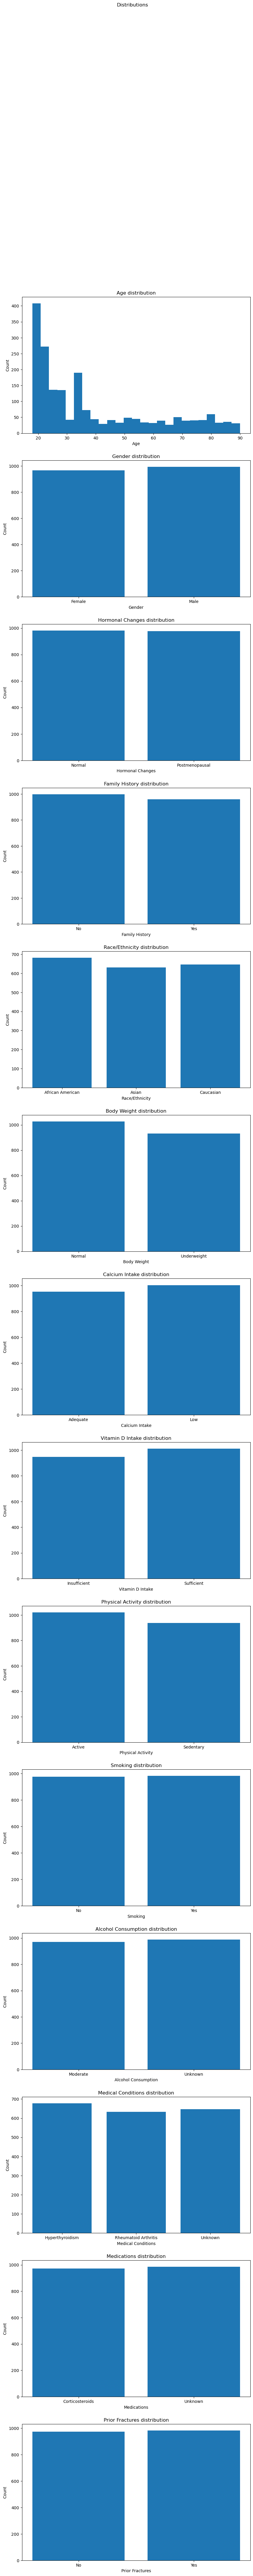

In [11]:
fig, axs = plt.subplots(len(df.columns) - 2, figsize=(10, 100))

fig.suptitle('Distributions')

i = 0
for column in df.columns:
    
    if (column == 'Id') | (column == 'Osteoporosis'):
        continue
    else:
        if column == 'Age':
            axs[i].hist(
                df[column],
                bins = 25
            )      

            axs[i].set_title(column + ' ' + 'distribution')
            axs[i].set_xlabel(column)
            axs[i].set_ylabel('Count')
        else:
            axs[i].bar(
                df.groupby(column).agg({'Id' : 'count'}).reset_index()[column],
                df.groupby(column).agg({'Id' : 'count'}).reset_index()['Id']
            )      

            axs[i].set_title(column + ' ' + 'distribution')
            axs[i].set_xlabel(column)
            axs[i].set_ylabel('Count')
        i = i + 1


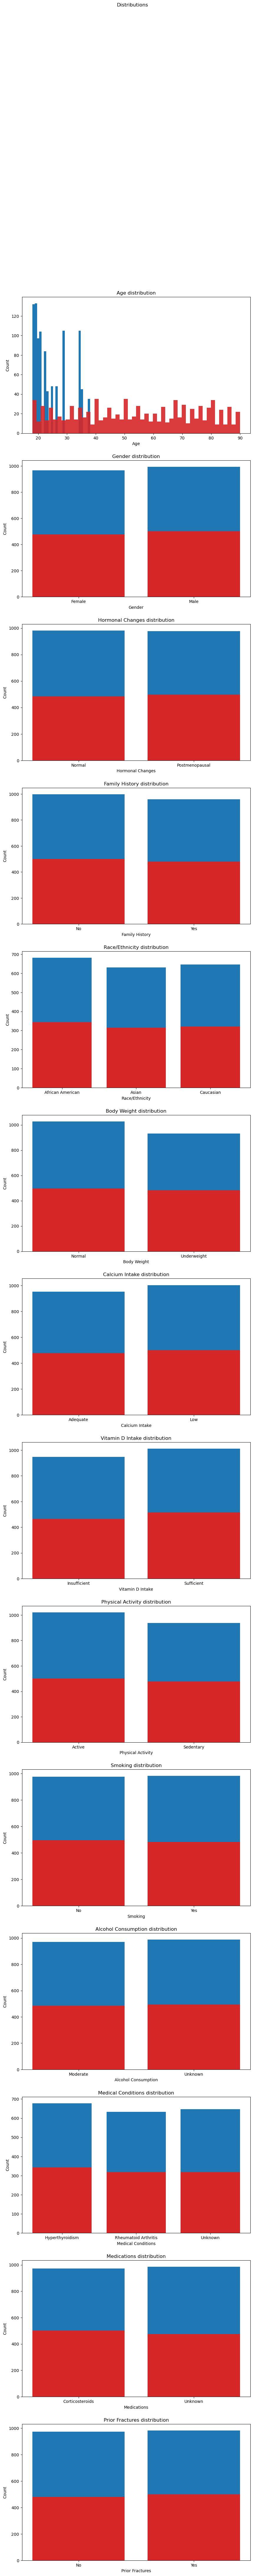

In [12]:
fig, axs = plt.subplots(len(df.columns) - 2, figsize=(10, 100))

fig.suptitle('Distributions')

i = 0
for column in df.columns:
    
    if (column == 'Id') | (column == 'Osteoporosis'):
        continue
    else:
        if column == 'Age':
            axs[i].hist(
                df[column].loc[df['Osteoporosis'] == 0],
                bins = 25,
                color = 'tab:blue'
            )
            
            axs[i].hist(
                df[column].loc[df['Osteoporosis'] == 1],
                bins = 50,
                color = 'tab:red',
                alpha = .9
            )    

            axs[i].set_title(column + ' ' + 'distribution')
            axs[i].set_xlabel(column)
            axs[i].set_ylabel('Count')
        else:
            axs[i].bar(
                df.groupby(column).agg({'Id' : 'count'}).reset_index()[column],
                df.groupby(column).agg({'Id' : 'count'}).reset_index()['Id']
            )  
            
            axs[i].bar(
                df.loc[df['Osteoporosis'] == 1].groupby(column).agg({'Id' : 'count'}).reset_index()[column],
                df.loc[df['Osteoporosis'] == 1].groupby(column).agg({'Id' : 'count'}).reset_index()['Id'],
                color = 'tab:red'
            )  

            axs[i].set_title(column + ' ' + 'distribution')
            axs[i].set_xlabel(column)
            axs[i].set_ylabel('Count')
        i = i + 1


In [13]:
from scipy.stats import f_oneway

ANOVA_age = f_oneway(df.Age.loc[df.Osteoporosis == 0], df.Age.loc[df.Osteoporosis == 1])
print(ANOVA_age)

F_onewayResult(statistic=1789.7653596679995, pvalue=2.83393260377006e-278)


In [14]:
df = pd.get_dummies(df)

In [15]:
X_train, X_test, y_train, y_test = train_test_split(df.drop(columns = ['Id', 'Osteoporosis']), df['Osteoporosis'], test_size = 0.2, random_state = 42)

In [16]:
rf = RandomForestClassifier()

In [17]:
# criterion
# max_depth
# min_samples_split

In [18]:
params = dict(criterion = ['gini', 'entropy', 'log_loss'], 
              max_depth = [10, 20, 30, 40, 50], 
              min_samples_split = [20, 50, 100, 150])

In [19]:
clf = RandomizedSearchCV(rf, params, random_state = 42, cv = 10, scoring = 'f1')

In [20]:
search = clf.fit(X_train, y_train)

In [21]:
search.best_estimator_

RandomForestClassifier(max_depth=20, min_samples_split=50)

In [22]:
pd.DataFrame(search.best_estimator_.feature_names_in_,
            search.best_estimator_.feature_importances_)

,0
0.819253,Age
0.007067,Gender_Female
0.009302,Gender_Male
0.007049,Hormonal Changes_Normal
0.007967,Hormonal Changes_Postmenopausal
0.007042,Family History_No
0.005909,Family History_Yes
0.006697,Race/Ethnicity_African American
0.006991,Race/Ethnicity_Asian
0.005862,Race/Ethnicity_Caucasian
